## Introduction

Collecting data from Skytrax about British airways, performing analysis and building a predictive model with machine learning. The initial step will be to scrape online reviews for data. Using the Skytrax website to accomplish this.The team leader requests that I concentrate on reviews that are exclusively about the airline. To enhance the results of the  analysis, I will gather as much data as I can.

### Data Collection

In [25]:
#Importing Necessary Libraries
import requests
from bs4 import BeautifulSoup

In [26]:
import pandas as pd

In [27]:

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100
reviews = []
ratings = []

for i in range(1, pages + 1):
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)
    parsed_content = BeautifulSoup(response.content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text().strip())
        rating = para.find_previous("span", {"itemprop": "ratingValue"})
        if rating:
            ratings.append(rating.text.strip())
        else:
            ratings.append(None)




In [28]:
df = pd.DataFrame({"reviews": reviews, "rating": ratings})
df.head()


,reviews,rating
0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...,9
1,✅ Trip Verified | Not only my first flight in...,10
2,✅ Trip Verified | My husband and myself were ...,10
3,✅ Trip Verified | Organised boarding process. ...,10
4,✅ Trip Verified | Outward journey BA245 Londo...,2


In [29]:
df




,reviews,rating
0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...,9
1,✅ Trip Verified | Not only my first flight in...,10
2,✅ Trip Verified | My husband and myself were ...,10
3,✅ Trip Verified | Organised boarding process. ...,10
4,✅ Trip Verified | Outward journey BA245 Londo...,2
...,...,...
1995,✅ Verified Review | Very good flight back to ...,8
1996,✅ Verified Review | London Heathrow to Miami ...,1
1997,✅ Verified Review | Every flight we took in B...,2
1998,After my positive post of the outbound journey...,4


### Download Dataset

In [30]:
#Downloading the final df 
#df.to_csv("output.csv")
#from google.colab import files
#files.download("output.csv")


### Data Cleaning & Analysis

In [31]:
#Verification column
df['verification'] = df['reviews'].str.split("|").str[0]
df.head()


,reviews,rating,verification
0,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...,9,✅ Trip Verified
1,✅ Trip Verified | Not only my first flight in...,10,✅ Trip Verified
2,✅ Trip Verified | My husband and myself were ...,10,✅ Trip Verified
3,✅ Trip Verified | Organised boarding process. ...,10,✅ Trip Verified
4,✅ Trip Verified | Outward journey BA245 Londo...,2,✅ Trip Verified


In [32]:
#Removing the parts before | in the reviews column
df.reviews= df.reviews.str.split('|',expand=True)[1]
df.head()

,reviews,rating,verification
0,BA 242 on the 6/2/23. Boarding was delayed du...,9,✅ Trip Verified
1,"Not only my first flight in 17 years, but al...",10,✅ Trip Verified
2,My husband and myself were flying to Madrid ...,10,✅ Trip Verified
3,Organised boarding process. Really friendly c...,10,✅ Trip Verified
4,Outward journey BA245 London to Buenos Aires...,2,✅ Trip Verified


In [33]:
#Check the length
df.shape

(2000, 3)

In [34]:
# check for missing values
print(df.isnull().sum())


reviews         117
rating            0
verification      0
dtype: int64


In 2000 row, the reviews column has 117 null valuew. That is negligible

In [35]:

df["verification"].value_counts()

✅ Trip Verified                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 983
✅ Verified Review                                                   

### Text Processing

In [36]:
#for lemmatization of words we will use nltk library
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()

In [37]:
import re

In [38]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [39]:
def clean_text(text):
    return re.sub('[^A-Za-z0-9]+', ' ', str(text))

df['Cleaned Reviews'] = df['reviews'].apply(clean_text)
df['Cleaned Rating'] = df['rating'].apply(clean_text)
df['Cleaned Verification'] = df['verification'].apply(clean_text)
df.head()



,reviews,rating,verification,Cleaned Reviews,Cleaned Rating,Cleaned Verification
0,BA 242 on the 6/2/23. Boarding was delayed du...,9,✅ Trip Verified,BA 242 on the 6 2 23 Boarding was delayed due...,9,Trip Verified
1,"Not only my first flight in 17 years, but al...",10,✅ Trip Verified,Not only my first flight in 17 years but also...,10,Trip Verified
2,My husband and myself were flying to Madrid ...,10,✅ Trip Verified,My husband and myself were flying to Madrid o...,10,Trip Verified
3,Organised boarding process. Really friendly c...,10,✅ Trip Verified,Organised boarding process Really friendly cr...,10,Trip Verified
4,Outward journey BA245 London to Buenos Aires...,2,✅ Trip Verified,Outward journey BA245 London to Buenos Aires ...,2,Trip Verified


In [40]:
#Simplifying the verification column -  Dropping wrong values
df['verification'].replace({"Not Verified": "Unverified"}, inplace=True)
df['Cleaned Verification'] = df['verification'].apply(clean_text)
df.head()


,reviews,rating,verification,Cleaned Reviews,Cleaned Rating,Cleaned Verification
0,BA 242 on the 6/2/23. Boarding was delayed du...,9,✅ Trip Verified,BA 242 on the 6 2 23 Boarding was delayed due...,9,Trip Verified
1,"Not only my first flight in 17 years, but al...",10,✅ Trip Verified,Not only my first flight in 17 years but also...,10,Trip Verified
2,My husband and myself were flying to Madrid ...,10,✅ Trip Verified,My husband and myself were flying to Madrid o...,10,Trip Verified
3,Organised boarding process. Really friendly c...,10,✅ Trip Verified,Organised boarding process Really friendly cr...,10,Trip Verified
4,Outward journey BA245 London to Buenos Aires...,2,✅ Trip Verified,Outward journey BA245 London to Buenos Aires ...,2,Trip Verified


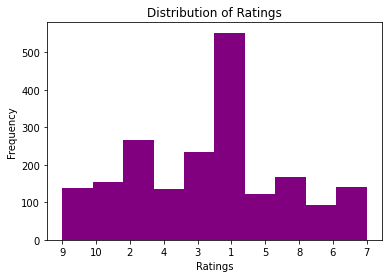

In [41]:
#Bar chart to compare the distribution of ratings:
import matplotlib.pyplot as plt

plt.hist(df['rating'], bins=10, color='purple')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()


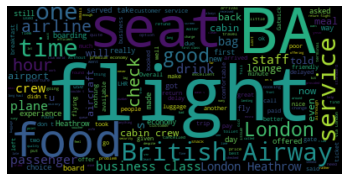

In [42]:
#visualize the most frequently occurring words in the Cleaned Reviews 
from wordcloud import WordCloud

wordcloud = WordCloud().generate(' '.join(df['Cleaned Reviews']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Sentiment analysis to determine the overall sentiment of the reviews

In [43]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


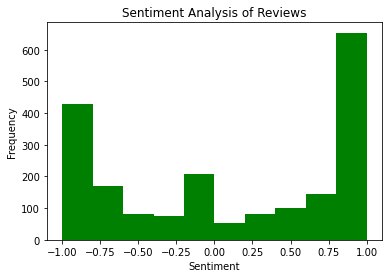

In [44]:

sentiment = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Cleaned Reviews'].apply(lambda x: sentiment.polarity_scores(x)['compound'])

plt.hist(df['Sentiment'], bins=10, color='green')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Reviews')
plt.show()


### Correlation analysis to see the relationship between the ratings, verifications, and other variables

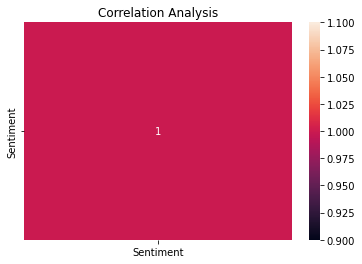

In [45]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Analysis')
plt.show()
